Note: this notebook should probably be placed in glance and focus dataset directory (i.e. Glance-Focus\dataset)

In [1]:
!ls

Star_EDA.ipynb	txt_db	vis_db


In [2]:
!ls txt_db

action_mapping.txt  events.json  test.jsonl  train.jsonl  val.jsonl


In [3]:
!ls vis_db

s3d.pth  strID2numID.json


In [4]:
!head vis_db/strID2numID.json


{"7R4YS": 0, "LUYWY": 1, "4C1KY": 2, "NQ1V6": 3, "M8OYC": 4, "9T0AC": 5, "CII5H": 6, "GD1LA": 7, "ZKIBW": 8, "BDY1V": 9, "SXMII": 10, "I6B5D": 11, "OHS4T": 12, "Q366H": 13, "3MV13": 14, "F1DQD": 15, "Q24KP": 16, "HXQ55": 17, "2NOVW": 18, "OMX6W": 19, "O3SQK": 20, "DEZJ5": 21, "45BIP": 22, "0XRD1": 23, "Q1K00": 24, "PDK24": 25, "N7GBK": 26, "DG33V": 27, "H6OA2": 28, "X4CZH": 29, "WTGVG": 30, "1IJ7V": 31, "16V9S": 32, "AXIW1": 33, "TBU3U": 34, "0CG15": 35, "APQSV": 36, "UKGO4": 37, "KCRQU": 38, "65ULK": 39, "RRNDQ": 40, "UBVV7": 41, "TUPTT": 42, "VF3Y0": 43, "SLAH4": 44, "U2V5A": 45, "U6QKX": 46, "Q0IHP": 47, "320ZB": 48, "WX4AP": 49, "PCF14": 50, "EMV0A": 51, "JQG43": 52, "AVVX3": 53, "J95U1": 54, "4JW8U": 55, "SX248": 56, "KENG1": 57, "3FEYY": 58, "DOUFF": 59, "V4YCA": 60, "J2J3Q": 61, "XDRZ7": 62, "1VIQC": 63, "CHBAS": 64, "U5QJR": 65, "VZY0C": 66, "GMSTS": 67, "ACJBD": 68, "F9K8L": 69, "RS3SQ": 70, "HAR5P": 71, "XHN6Y": 72, "KCLMY": 73, "E9UYZ": 74, "PG1ID": 75, "U5CDS": 76, "VXRPP":

In [5]:
filepath = "txt_db/train.jsonl"

In [7]:
#conda install pandas -y

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - nvidia
 - pytorch
 - anaconda
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [9]:
with open(filepath, 'r') as file:
    data = [json.loads(line) for line in file]

In [10]:
data[100]

{'question_id': 'Interaction_T1_229',
 'question': 'Which object was taken by the person?',
 'video_id': '3HLP7',
 'options': ['The blanket.',
  'The picture.',
  'The cup/glass/bottle.',
  'The box.'],
 'answer': 1}

In [11]:
import random

df = pd.DataFrame(data)

df['question_type'] = df['question_id'].apply(lambda x: x.split('_')[0])
df.sort_values(by=['question_type', 'question_id'], inplace=True)
df.reset_index(drop=True, inplace=True)

def get_a_rando(myArg):
    if myArg not in [0, 1, 2, 3]:
        raise ValueError("Invalid argument. myArg must be 0, 1, 2, or 3.")
    
    indices = [0] + df[df['question_type'] == 'Interaction'].index.tolist() + [len(df)]
    
    start_idx = indices[myArg]
    end_idx = indices[myArg + 1]
    random_idx = random.randint(start_idx, end_idx - 1)
    random_question = df.iloc[random_idx]
    
    return random_question

random_question = get_a_rando(0)
print(random_question)

question_id                                     Feasibility_T2_644
question         What else is the person able to do with the cl...
video_id                                                     5EFVR
options          [Take the clothes., Tidy up the clothes., Clos...
answer                                                           0
question_type                                          Feasibility
Name: 366, dtype: object


In [12]:
df

,question_id,question,video_id,options,answer,question_type
0,Feasibility_T2_1000,What else is the person able to do with the to...,VD0H8,"[Put down the towel., Take the towel., Throw t...",2,Feasibility
1,Feasibility_T2_1001,What else is the person able to do with the door?,5KOTU,"[Close the door., Take the door., Put down the...",0,Feasibility
2,Feasibility_T2_1002,What else is the person able to do with the cl...,5KOTU,"[Close the closet/cabinet., Tidy up the closet...",0,Feasibility
3,Feasibility_T2_1004,What else is the person able to do with the bl...,56PK0,"[Put down the blanket., Eat the blanket., Tidy...",0,Feasibility
4,Feasibility_T2_1005,What else is the person able to do with the bl...,56PK0,"[Put down the blanket., Throw the blanket., Ta...",0,Feasibility
...,...,...,...,...,...,...
45726,Sequence_T6_995,What did the person do to the bed before takin...,EG0VZ,"[Put down., Sat on., Ate., Lied on.]",1,Sequence
45727,Sequence_T6_996,What did the person do to the dish before hold...,BM9NZ,"[Took., Opened., Washed., Put down.]",0,Sequence
45728,Sequence_T6_997,What did the person do to the pillow before ta...,BM9NZ,"[Put down., Ate., Lied on., Threw.]",3,Sequence
45729,Sequence_T6_998,What did the person do to the clothes before t...,MZ3I3,"[Put down., Sat on., Tidied up., Closed.]",0,Sequence


In [14]:
import numpy as np

In [13]:
df = df.sort_values(by='question_id').reset_index(drop=True)

def get_question_type_indices(df):
    unique_types = df['question_id'].str.extract(r'^(\w+)')[0].unique()
    type_indices = {typ: df[df['question_id'].str.startswith(typ)].index.tolist() for typ in unique_types}
    return type_indices

indices = get_question_type_indices(df)

def get_a_question(myArg):
    question_types = list(indices.keys())
    if myArg < 0 or myArg >= len(question_types):
        return "Invalid input. Please enter a number between 0 and {}.".format(len(question_types) - 1)
    selected_type = question_types[myArg]
    question_pool = indices[selected_type]
    random_index = np.random.choice(question_pool)
    return df.iloc[random_index]



NameError: name 'np' is not defined

In [15]:
print(get_a_question(0))  
print(get_a_question(1))  
print(get_a_question(2))  
print(get_a_question(3)) 

question_id                                    Feasibility_T2_1000
question         What else is the person able to do with the to...
video_id                                                     VD0H8
options          [Put down the towel., Take the towel., Throw t...
answer                                                           2
question_type                                          Feasibility
Name: 0, dtype: object
question_id                                    Feasibility_T2_1001
question         What else is the person able to do with the door?
video_id                                                     5KOTU
options          [Close the door., Take the door., Put down the...
answer                                                           0
question_type                                          Feasibility
Name: 1, dtype: object
question_id                                    Feasibility_T2_1002
question         What else is the person able to do with the cl...
video_id        

In [16]:
random_question.question

'What else is the person able to do with the clothes?'

In [19]:
data[0]

{'question_id': 'Interaction_T1_4',
 'question': 'Which object was eaten by the person?',
 'video_id': 'TJZ0P',
 'options': ['The sandwich.', 'The medicine.', 'The blanket.', 'The box.'],
 'answer': 0}

In [21]:
df_questions = pd.json_normalize(data, sep='_')
df_choices = pd.json_normalize(data, record_path='options', meta=['question_id'], record_prefix='option_')

print(df_questions.describe())
print("Unique videos:", df_questions['video_id'].nunique())



             answer
count  45731.000000
mean       1.506637
std        1.120908
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Unique videos: 3032


In [25]:
df_choices.keys

<bound method NDFrame.keys of                               option_0          question_id
0                        The sandwich.     Interaction_T1_4
1                        The medicine.     Interaction_T1_4
2                         The blanket.     Interaction_T1_4
3                             The box.     Interaction_T1_4
4                            The book.     Interaction_T1_5
...                                ...                  ...
182919           Put down the clothes.  Feasibility_T6_1470
182920          Lie on the sofa/couch.  Feasibility_T6_1471
182921       Close the closet/cabinet.  Feasibility_T6_1471
182922  Put down the cup/glass/bottle.  Feasibility_T6_1471
182923         Close the refrigerator.  Feasibility_T6_1471

[182924 rows x 2 columns]>

In [28]:
choice_counts = df_choices['option_0'].value_counts()


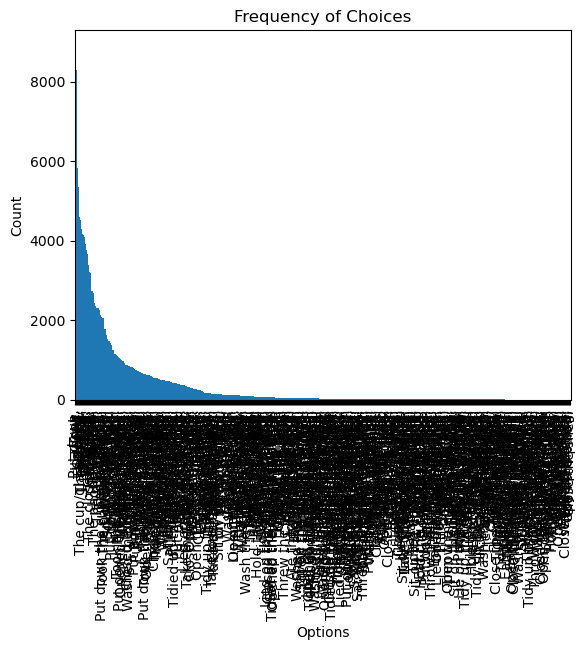

In [29]:
choice_counts.plot(kind='bar')
plt.title('Frequency of Choices')
plt.xlabel('Options')
plt.ylabel('Count')
plt.show()



In [30]:
choice_counts

option_0
Put down.            8855
Took.                8289
Threw.               5826
Opened.              5359
Closed.              4588
                     ... 
Wash the blanket.       1
Eat the picture.        1
Tidy up the bag.        1
Open the pillow.        1
Close the shelf.        1
Name: count, Length: 496, dtype: int64

In [32]:
data[0]

{'question_id': 'Interaction_T1_4',
 'question': 'Which object was eaten by the person?',
 'video_id': 'TJZ0P',
 'options': ['The sandwich.', 'The medicine.', 'The blanket.', 'The box.'],
 'answer': 0}

In [34]:
function_usage = pd.json_normalize(data,  meta=['question_id'], record_prefix='prog_')

In [35]:
function_usage

,question_id,question,video_id,options,answer
0,Interaction_T1_4,Which object was eaten by the person?,TJZ0P,"[The sandwich., The medicine., The blanket., T...",0
1,Interaction_T1_5,Which object was closed by the person?,TJZ0P,"[The book., The refrigerator., The closet/cabi...",0
2,Interaction_T1_7,Which object was taken by the person?,B82GJ,"[The food., The laptop., The towel., The broom.]",2
3,Interaction_T1_8,Which object was sat on by the person?,DUZDL,"[The sofa/couch., The table., The bed., The fl...",2
4,Interaction_T1_9,Which object was put down by the person?,DUZDL,"[The food., The broom., The shoe., The clothes.]",2
...,...,...,...,...,...
45726,Feasibility_T6_1464,What is the person able to do after putting do...,LTC5Y,"[Tidy up the table., Throw the clothes., Sit a...",2
45727,Feasibility_T6_1467,What is the person able to do after putting do...,B71ZJ,"[Sit at the table., Sit on the floor., Take th...",2
45728,Feasibility_T6_1469,What is the person able to do after opening th...,FPWD0,"[Throw the shoe., Wash the table., Sit at the ...",2
45729,Feasibility_T6_1470,What is the person able to do after walking th...,FPWD0,"[Wash the table., Tidy up the table., Sit at t...",2


In [36]:
function_usage.keys()

Index(['question_id', 'question', 'video_id', 'options', 'answer'], dtype='object')

In [37]:
print(function_usage['answer'].value_counts())


answer
3    11617
0    11396
1    11387
2    11331
Name: count, dtype: int64


In [38]:
df_questions = pd.json_normalize(data, sep='_')
df_choices = pd.json_normalize(data, record_path='options', meta=['question_id', 'video_id', 'question', 'answer'], record_prefix='option_')

In [39]:
df_questions

,question_id,question,video_id,options,answer
0,Interaction_T1_4,Which object was eaten by the person?,TJZ0P,"[The sandwich., The medicine., The blanket., T...",0
1,Interaction_T1_5,Which object was closed by the person?,TJZ0P,"[The book., The refrigerator., The closet/cabi...",0
2,Interaction_T1_7,Which object was taken by the person?,B82GJ,"[The food., The laptop., The towel., The broom.]",2
3,Interaction_T1_8,Which object was sat on by the person?,DUZDL,"[The sofa/couch., The table., The bed., The fl...",2
4,Interaction_T1_9,Which object was put down by the person?,DUZDL,"[The food., The broom., The shoe., The clothes.]",2
...,...,...,...,...,...
45726,Feasibility_T6_1464,What is the person able to do after putting do...,LTC5Y,"[Tidy up the table., Throw the clothes., Sit a...",2
45727,Feasibility_T6_1467,What is the person able to do after putting do...,B71ZJ,"[Sit at the table., Sit on the floor., Take th...",2
45728,Feasibility_T6_1469,What is the person able to do after opening th...,FPWD0,"[Throw the shoe., Wash the table., Sit at the ...",2
45729,Feasibility_T6_1470,What is the person able to do after walking th...,FPWD0,"[Wash the table., Tidy up the table., Sit at t...",2


In [41]:
print(df_questions.info())
print(df_questions.head())

print(df_choices.info())
print(df_choices.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45731 entries, 0 to 45730
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question_id  45731 non-null  object
 1   question     45731 non-null  object
 2   video_id     45731 non-null  object
 3   options      45731 non-null  object
 4   answer       45731 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
        question_id                                  question video_id  \
0  Interaction_T1_4     Which object was eaten by the person?    TJZ0P   
1  Interaction_T1_5    Which object was closed by the person?    TJZ0P   
2  Interaction_T1_7     Which object was taken by the person?    B82GJ   
3  Interaction_T1_8    Which object was sat on by the person?    DUZDL   
4  Interaction_T1_9  Which object was put down by the person?    DUZDL   

                                             options  answer  
0  [The sandwich., The medicine., The blan

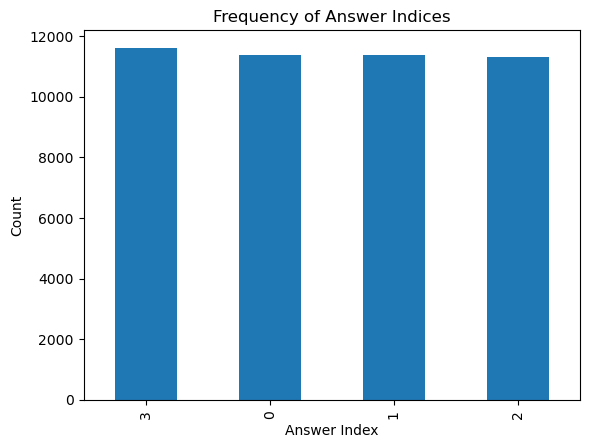

In [42]:
df_questions['answer'].value_counts().plot(kind='bar')
plt.title('Frequency of Answer Indices')
plt.xlabel('Answer Index')
plt.ylabel('Count')
plt.show()

In [45]:
!pip install scikit-learn

In [44]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [47]:
df_choices

,option_0,question_id,video_id,question,answer
0,The sandwich.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
1,The medicine.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
2,The blanket.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
3,The box.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
4,The book.,Interaction_T1_5,TJZ0P,Which object was closed by the person?,0
...,...,...,...,...,...
182919,Put down the clothes.,Feasibility_T6_1470,FPWD0,What is the person able to do after walking th...,2
182920,Lie on the sofa/couch.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3
182921,Close the closet/cabinet.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3
182922,Put down the cup/glass/bottle.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3


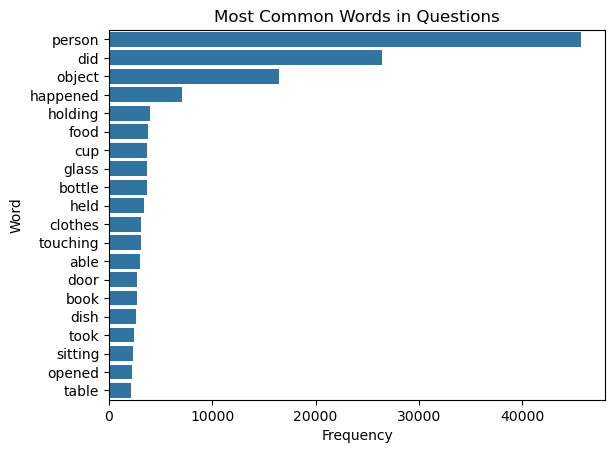

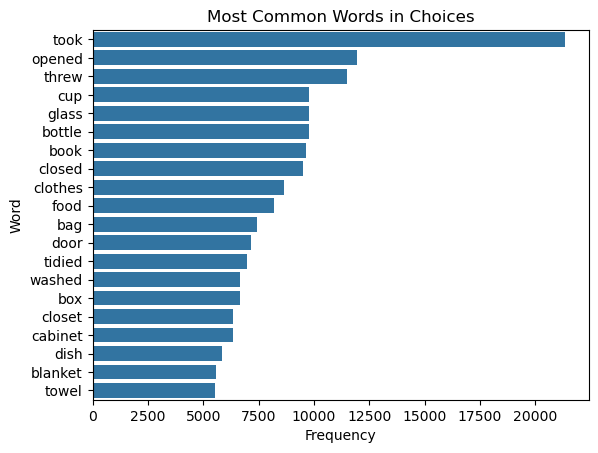

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_the_commons(series, title='Most common words', n_features=20):
    vec = CountVectorizer(stop_words='english').fit(series)
    bag_of_words = vec.transform(series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words_df = pd.DataFrame(words_freq[:n_features])
    top_words_df.columns = ['Word', 'Frequency']
    sns.barplot(x='Frequency', y='Word', data=top_words_df)
    plt.title(title)
    plt.show()

plot_the_commons(df_questions['question'], 'Most Common Words in Questions')

plot_the_commons(df_choices['option_0'], 'Most Common Words in Choices')


In [49]:
df_choices

,option_0,question_id,video_id,question,answer
0,The sandwich.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
1,The medicine.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
2,The blanket.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
3,The box.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0
4,The book.,Interaction_T1_5,TJZ0P,Which object was closed by the person?,0
...,...,...,...,...,...
182919,Put down the clothes.,Feasibility_T6_1470,FPWD0,What is the person able to do after walking th...,2
182920,Lie on the sofa/couch.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3
182921,Close the closet/cabinet.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3
182922,Put down the cup/glass/bottle.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3


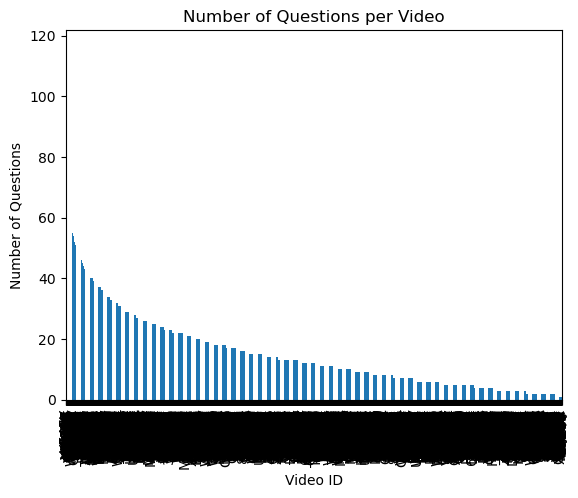

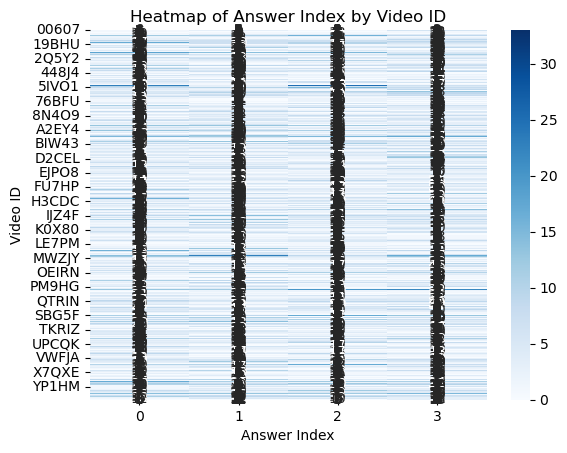

In [51]:
video_question_counts = df_questions['video_id'].value_counts()
video_question_counts.plot(kind='bar')
plt.title('Number of Questions per Video')
plt.xlabel('Video ID')
plt.ylabel('Number of Questions')
plt.show()

answer_video_pivot = df_questions.pivot_table(index='video_id', columns='answer', aggfunc='size', fill_value=0)
sns.heatmap(answer_video_pivot, annot=True, cmap='Blues')
plt.title('Heatmap of Answer Index by Video ID')
plt.xlabel('Answer Index')
plt.ylabel('Video ID')
plt.show()

In [54]:
data[0]

{'question_id': 'Interaction_T1_4',
 'question': 'Which object was eaten by the person?',
 'video_id': 'TJZ0P',
 'answer': 0,
 'choices': [{'choice_id': 0, 'choice': 'The sandwich.'},
  {'choice_id': 1, 'choice': 'The medicine.'},
  {'choice_id': 2, 'choice': 'The blanket.'},
  {'choice_id': 3, 'choice': 'The box.'}]}

In [55]:
for entry in data:
    entry['choices'] = [{'choice_id': idx, 'choice': option} for idx, option in enumerate(entry['choices'])]
    del entry['choices']  

df_questions = pd.json_normalize(data, sep='_')
df_choices = pd.json_normalize(data, record_path='choices', meta=['question_id', 'video_id', 'question', 'answer'], record_prefix='choice_')

KeyError: "Key 'choices' not found. If specifying a record_path, all elements of data should have the path."

In [56]:
print(df_questions.info())
print(df_questions.head())

print(df_choices.info())
print(df_choices.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45731 entries, 0 to 45730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question_id  45731 non-null  object
 1   question     45731 non-null  object
 2   video_id     45731 non-null  object
 3   answer       45731 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None
        question_id                                  question video_id  answer
0  Interaction_T1_4     Which object was eaten by the person?    TJZ0P       0
1  Interaction_T1_5    Which object was closed by the person?    TJZ0P       0
2  Interaction_T1_7     Which object was taken by the person?    B82GJ       2
3  Interaction_T1_8    Which object was sat on by the person?    DUZDL       2
4  Interaction_T1_9  Which object was put down by the person?    DUZDL       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182924 entries, 0 to 182923
Data columns (total 6 columns):
 #   Co

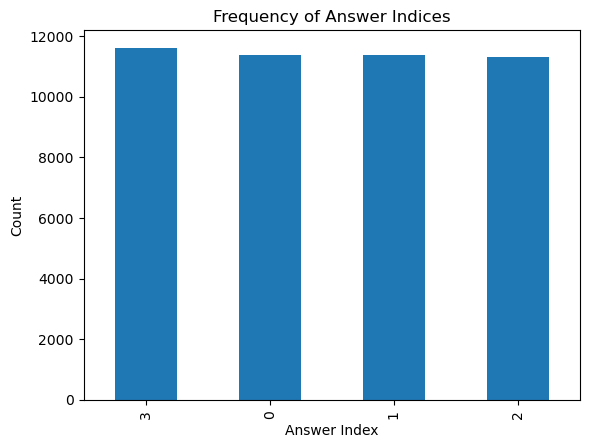

In [57]:
df_questions['answer'].value_counts().plot(kind='bar')
plt.title('Frequency of Answer Indices')
plt.xlabel('Answer Index')
plt.ylabel('Count')
plt.show()

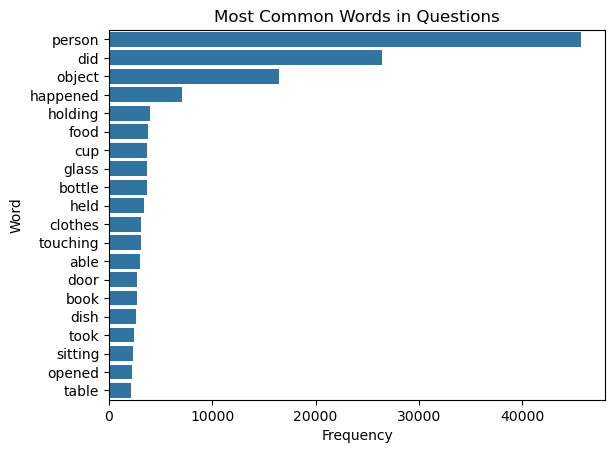

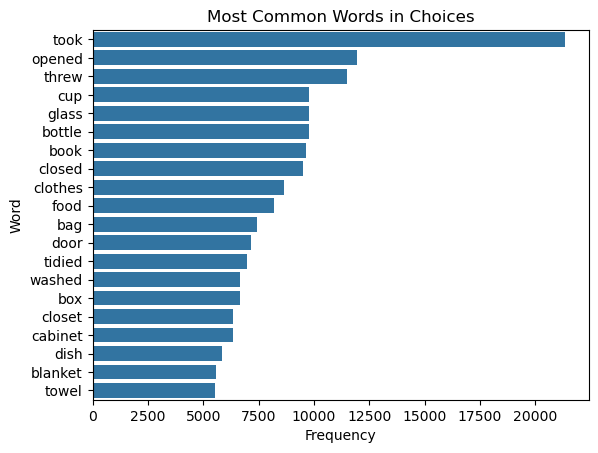

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_most_common_words(series, title='Most common words', n_features=20):
    vec = CountVectorizer(stop_words='english').fit(series)
    bag_of_words = vec.transform(series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words_df = pd.DataFrame(words_freq[:n_features])
    top_words_df.columns = ['Word', 'Frequency']
    sns.barplot(x='Frequency', y='Word', data=top_words_df)
    plt.title(title)
    plt.show()

plot_most_common_words(df_questions['question'], 'Most Common Words in Questions')

plot_most_common_words(df_choices['choice_choice'], 'Most Common Words in Choices')

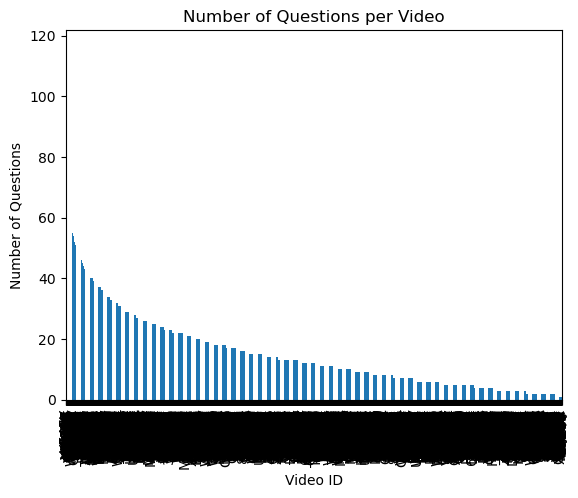

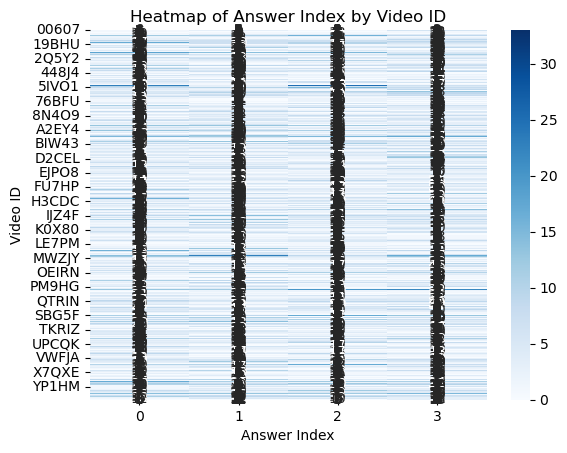

In [59]:
video_question_counts = df_questions['video_id'].value_counts()
video_question_counts.plot(kind='bar')
plt.title('Number of Questions per Video')
plt.xlabel('Video ID')
plt.ylabel('Number of Questions')
plt.show()

answer_video_pivot = df_questions.pivot_table(index='video_id', columns='answer', aggfunc='size', fill_value=0)
sns.heatmap(answer_video_pivot, annot=True, cmap='Blues')
plt.title('Heatmap of Answer Index by Video ID')
plt.xlabel('Answer Index')
plt.ylabel('Video ID')
plt.show()

In [63]:
answer_video_pivot

answer,0,1,2,3
video_id,,,,
00607,6,7,5,3
00MFE,2,1,3,1
00N38,3,7,5,3
00T1E,1,3,1,6
00X3U,0,2,7,4
...,...,...,...,...
ZXN6A,12,12,10,7
ZY2B1,3,1,3,6
ZZ3HT,6,12,7,13


prefix
Sequence       89048
Interaction    65212
Prediction     16620
Feasibility    12044
Name: count, dtype: int64


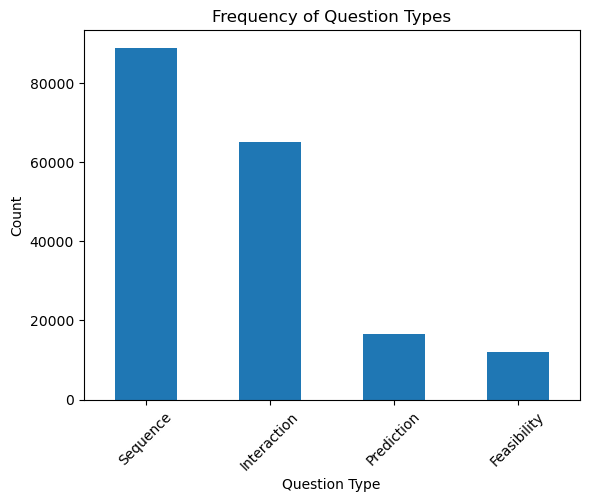

In [60]:

df_choices['prefix'] = df_choices['question_id'].apply(lambda x: x.split('_')[0])

prefix_counts = df_choices['prefix'].value_counts()

print(prefix_counts)

import matplotlib.pyplot as plt

prefix_counts.plot(kind='bar')
plt.title('Frequency of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [64]:
prefix_counts

prefix
Sequence       89048
Interaction    65212
Prediction     16620
Feasibility    12044
Name: count, dtype: int64

In [65]:
df_choices

,choice_choice_id,choice_choice,question_id,video_id,question,answer,prefix
0,0,The sandwich.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0,Interaction
1,1,The medicine.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0,Interaction
2,2,The blanket.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0,Interaction
3,3,The box.,Interaction_T1_4,TJZ0P,Which object was eaten by the person?,0,Interaction
4,0,The book.,Interaction_T1_5,TJZ0P,Which object was closed by the person?,0,Interaction
...,...,...,...,...,...,...,...
182919,3,Put down the clothes.,Feasibility_T6_1470,FPWD0,What is the person able to do after walking th...,2,Feasibility
182920,0,Lie on the sofa/couch.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3,Feasibility
182921,1,Close the closet/cabinet.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3,Feasibility
182922,2,Put down the cup/glass/bottle.,Feasibility_T6_1471,FPWD0,What is the person able to do after walking th...,3,Feasibility


In [66]:
df_questions

,question_id,question,video_id,answer
0,Interaction_T1_4,Which object was eaten by the person?,TJZ0P,0
1,Interaction_T1_5,Which object was closed by the person?,TJZ0P,0
2,Interaction_T1_7,Which object was taken by the person?,B82GJ,2
3,Interaction_T1_8,Which object was sat on by the person?,DUZDL,2
4,Interaction_T1_9,Which object was put down by the person?,DUZDL,2
...,...,...,...,...
45726,Feasibility_T6_1464,What is the person able to do after putting do...,LTC5Y,2
45727,Feasibility_T6_1467,What is the person able to do after putting do...,B71ZJ,2
45728,Feasibility_T6_1469,What is the person able to do after opening th...,FPWD0,2
45729,Feasibility_T6_1470,What is the person able to do after walking th...,FPWD0,2


In [67]:
video_question_counts

video_id
R4SJJ    116
YE47Y    104
FC2SK     99
FVINY     91
X2LBW     82
        ... 
88CD5      1
Z9THH      1
FKGY7      1
E5ZF5      1
N7X3T      1
Name: count, Length: 3032, dtype: int64